In [1]:
import salem as sa
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from pyproj import Proj
import numpy as np
import pandas as pd
from importlib import reload
import darwin
reload(darwin)

<module 'darwin' from '/home/ben/projects/darwin/darwin.py'>

In [2]:
basepath = Path('/home/ben/data/GAR/')

In [3]:
color_map = LinearSegmentedColormap.from_list(
    "mycmap",
    ["white", "steelblue", "c", "khaki", "orange", "orangered", "r", "darkred"],
)

def plot_map(ax, ds, model, cmap, scalebar=False):
    smap = ds.salem.get_map(data=model, cmap=cmap, vmin=0, vmax=1020)
    x, y = smap.grid.transform(lons, lats)
    smap.set_shapefile(countries=False)
    smap.set_lonlat_contours(xinterval=1)
    if scalebar:
        smap.set_scale_bar(location=(0.85, 0.08))
    smap.visualize(addcbar=False)
    return smap

In [4]:
def remove_nonalphanumerics(string: str) -> str:
    return "".join(ch for ch in string if ch.isalnum())

In [5]:
grid = sa.mercator_grid(center_ll=(-90, 0), extent=(100000, 100000))
oceans = sa.read_shapefile(sa.get_demo_file('ne_50m_ocean.shp'),
                              cached=True)
grid

<salem.Grid>
  proj: +datum=WGS84 +k=0.9996 +lat_0=0 +lon_0=-90 +no_defs+proj=tmerc +units=m +x_0=0 +y_0=0
  pixel_ref: corner
  origin: lower-left
  (nx, ny): (600, 600)
  (dx, dy): (166.66666666666666, 166.66666666666666)
  (x0, y0): (-50000.0, -50000.0)

In [13]:
reload(darwin)
datasets = {}
var = 'prcp'
paths = {
    'tropical': f'rc_trop_ls_tutorial/rc_trop_ls_tutorial_d02km_d_2d_{var}_2022.nc',
    'Kain-Fritsch (KF)': f'rc_trop_ls_KF/rc_trop_ls_KF_d02km_d_2d_{var}_2022.nc',
    'KF with kfeta-trigger': f'rc_trop_ls_KF_kfeta-trigger/rc_trop_ls_KF_kfeta-trigger_d02km_d_2d_{var}_2022.nc',
    'KF Cumulus Parametrization': f'rc_trop_ls_KFCuP/rc_trop_ls_KFCuP_d02km_d_2d_{var}_2022.nc',
    'Grell 3D': f'rc_trop_ls_G3D/rc_trop_ls_G3D_d02km_d_2d_{var}_2022.nc',
    'Thompson': f'rc_trop_ls_TG/rc_trop_ls_TG_d02km_d_2d_{var}_2022.nc',
    'MYNN': f'rc_trop_ls_MYNN/rc_trop_ls_MYNN_d02km_d_2d_{var}_2022.nc',
    'MYNN-TG': f'rc_trop_ls_MYNN-TG/rc_trop_ls_MYNN-TG_d02km_d_2d_{var}_2022.nc',
    'KF-TG': f'rc_trop_ls_KF-TG/rc_trop_ls_KF-TG_d02km_d_2d_{var}_2022.nc',

    # 'tropical': f'rc_trop_ls_vert43/rc_trop_ls_vert43_d02km_d_2d_{var}_2022.nc',
}
for key, value in paths.items():
    datasets[key] = darwin.open_experiment(from_path=basepath / value)
    datasets[key]['experiment'] = value.split('/')[0]
    datasets[key]['wrf_product'] = datasets[key]['wrf_product'].sel(time=slice('2022-04-01', '2022-04-30'))


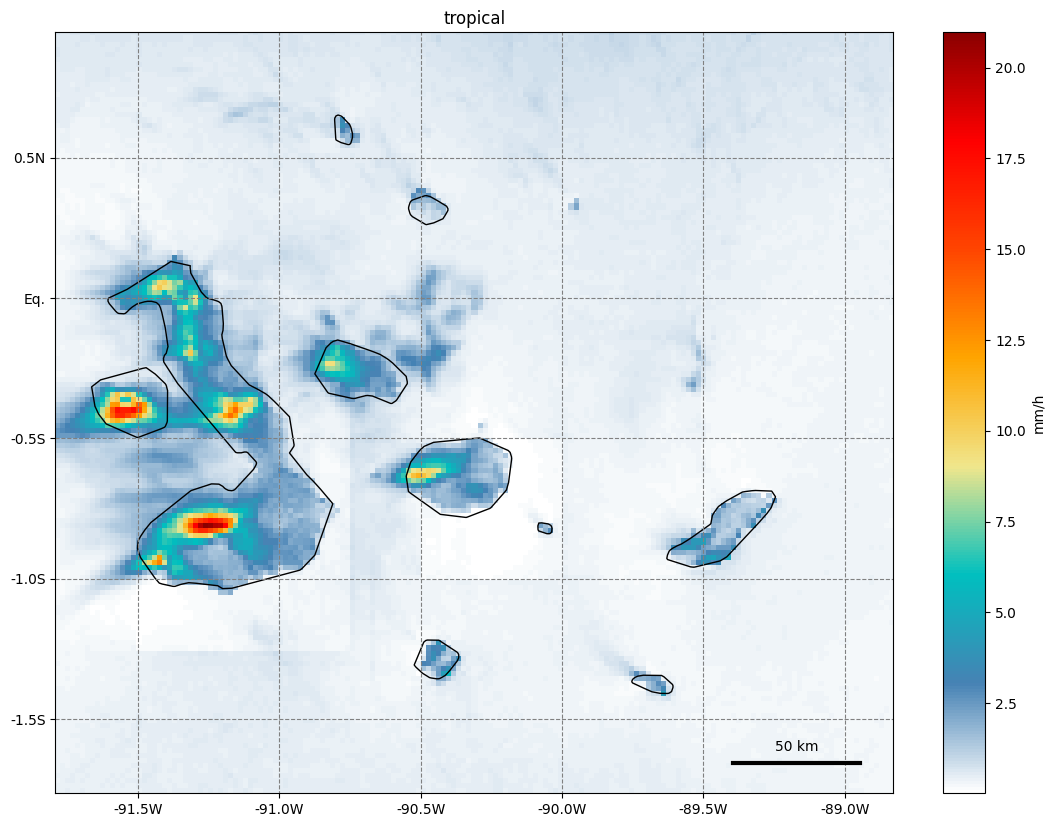

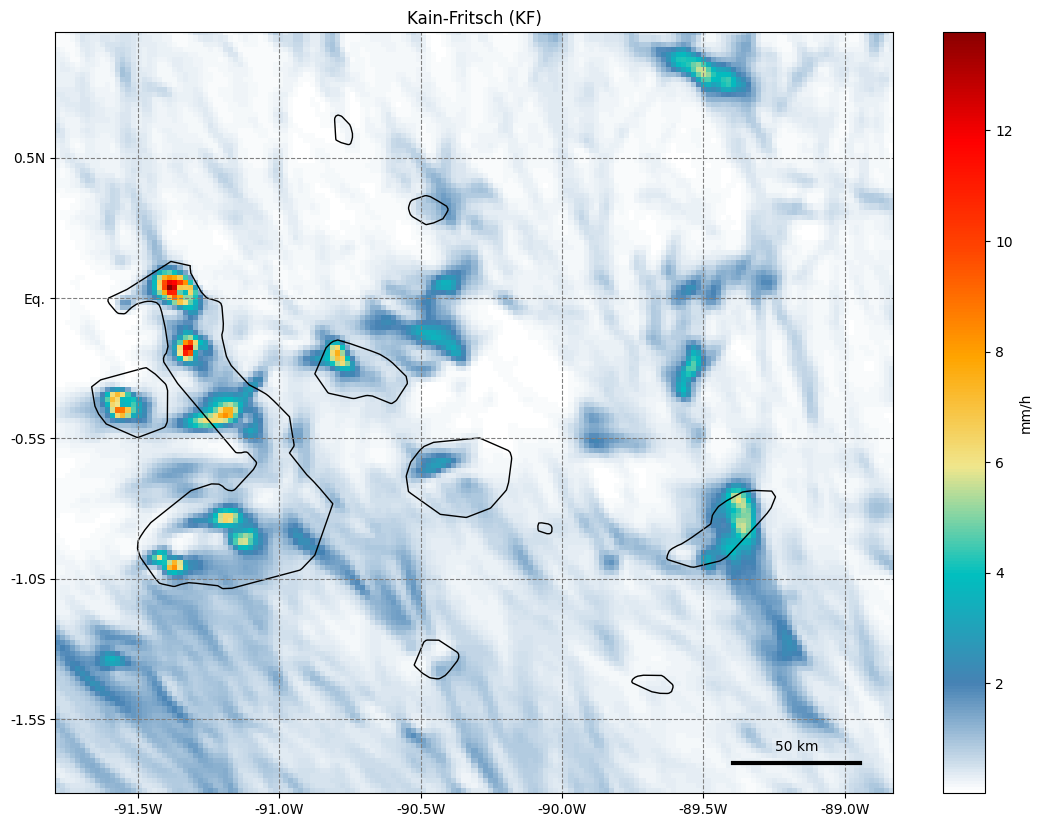

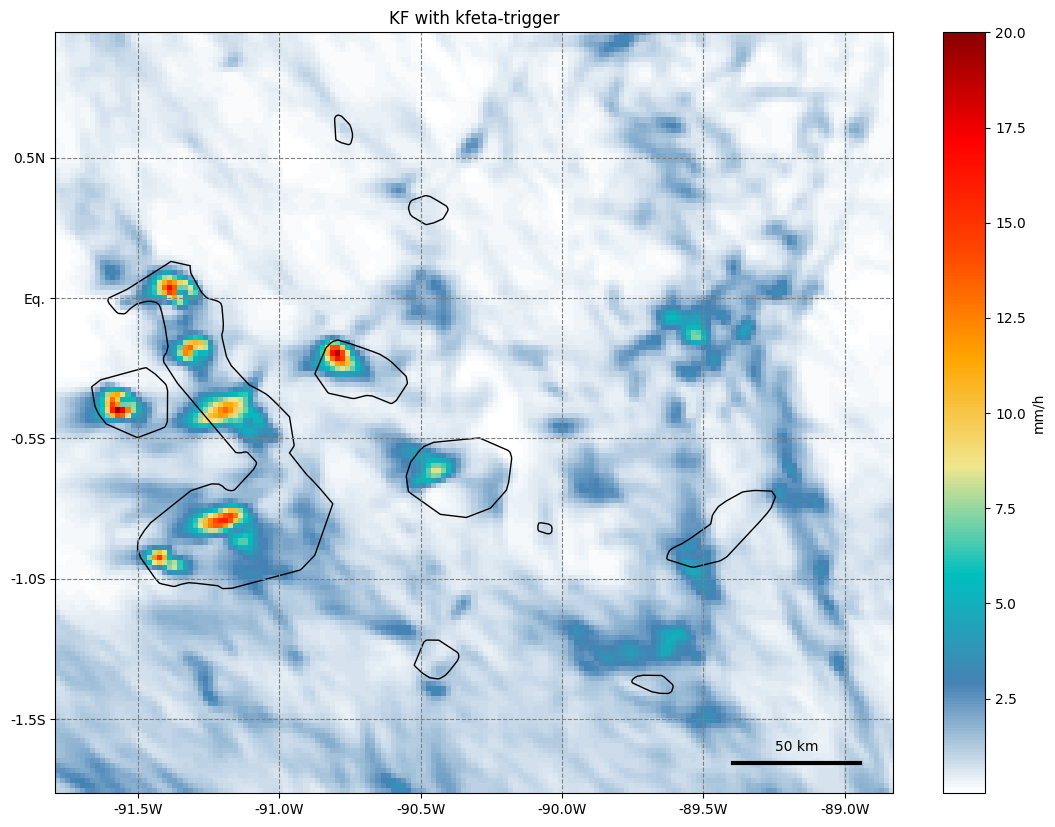

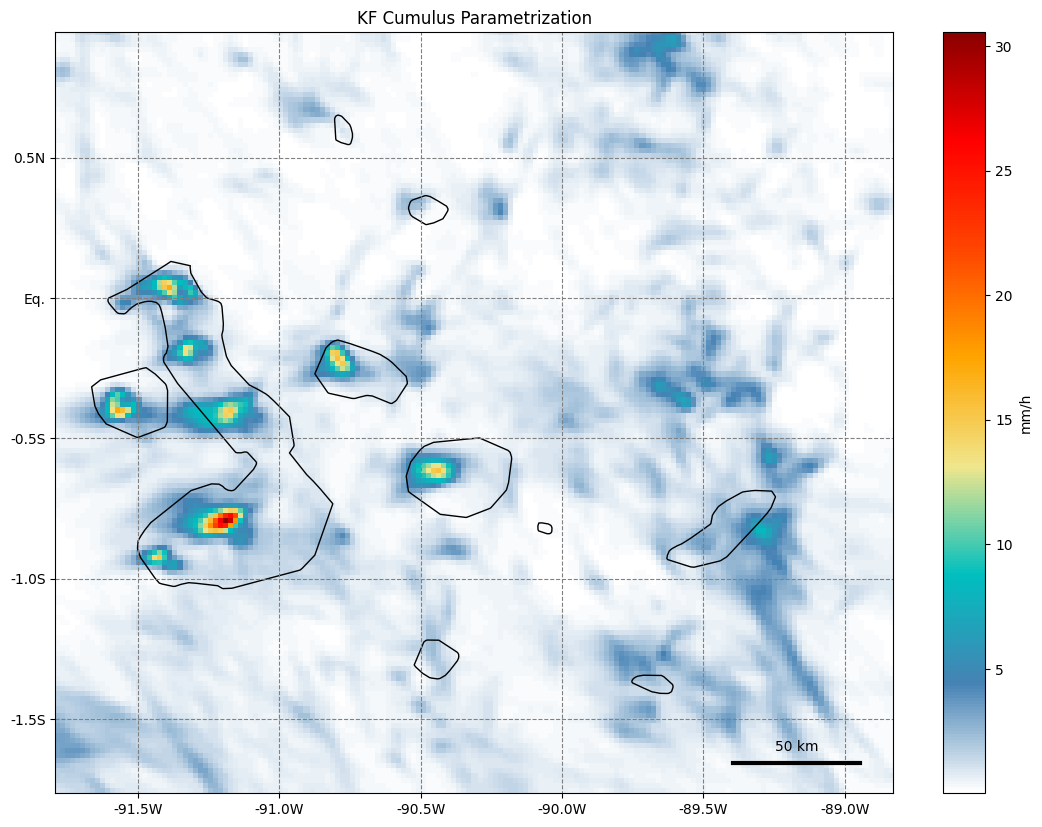

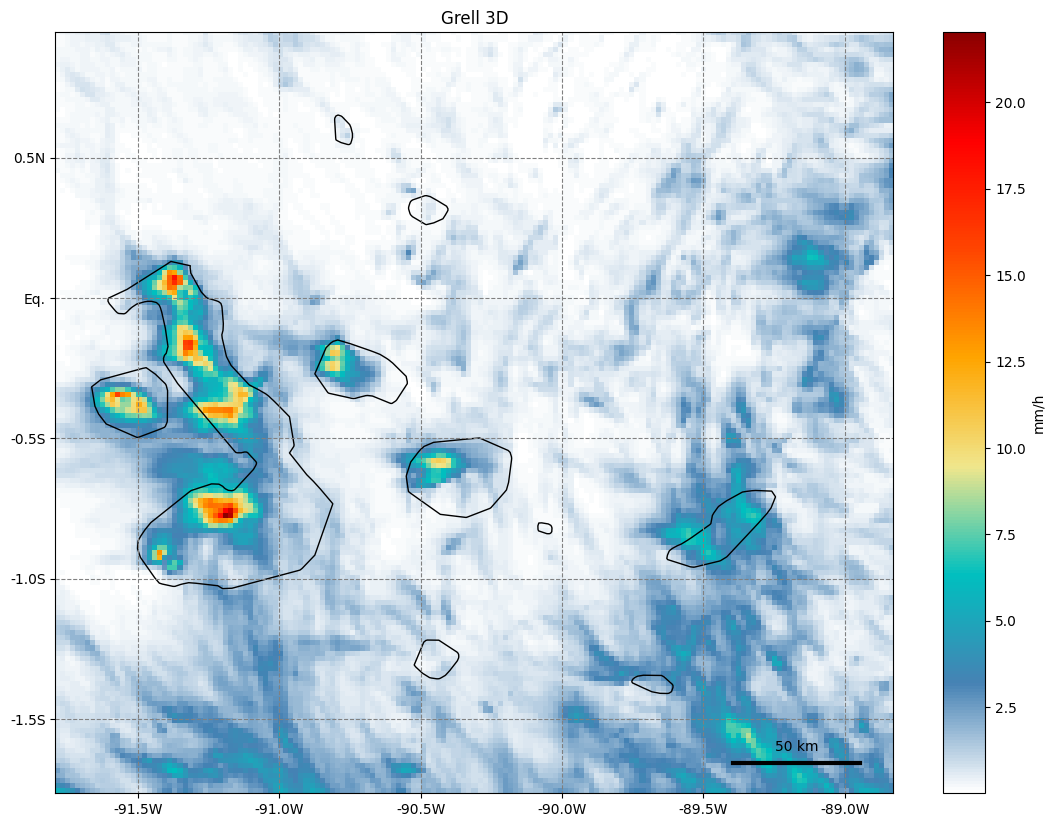

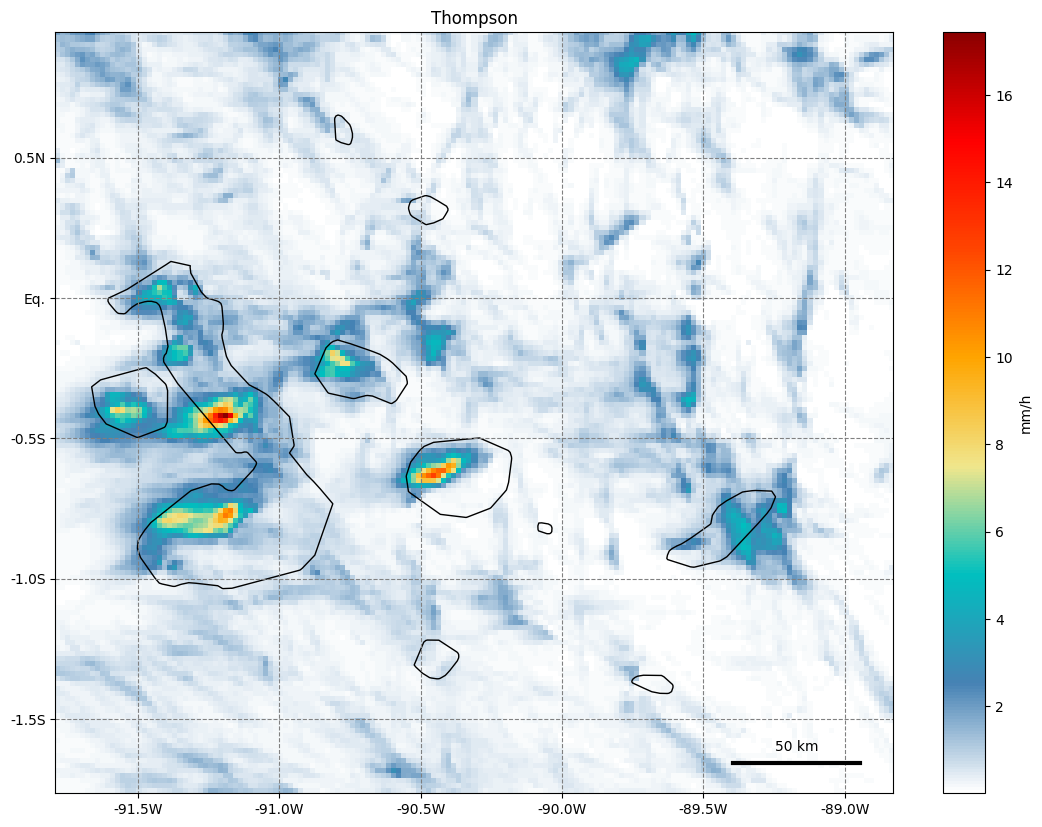

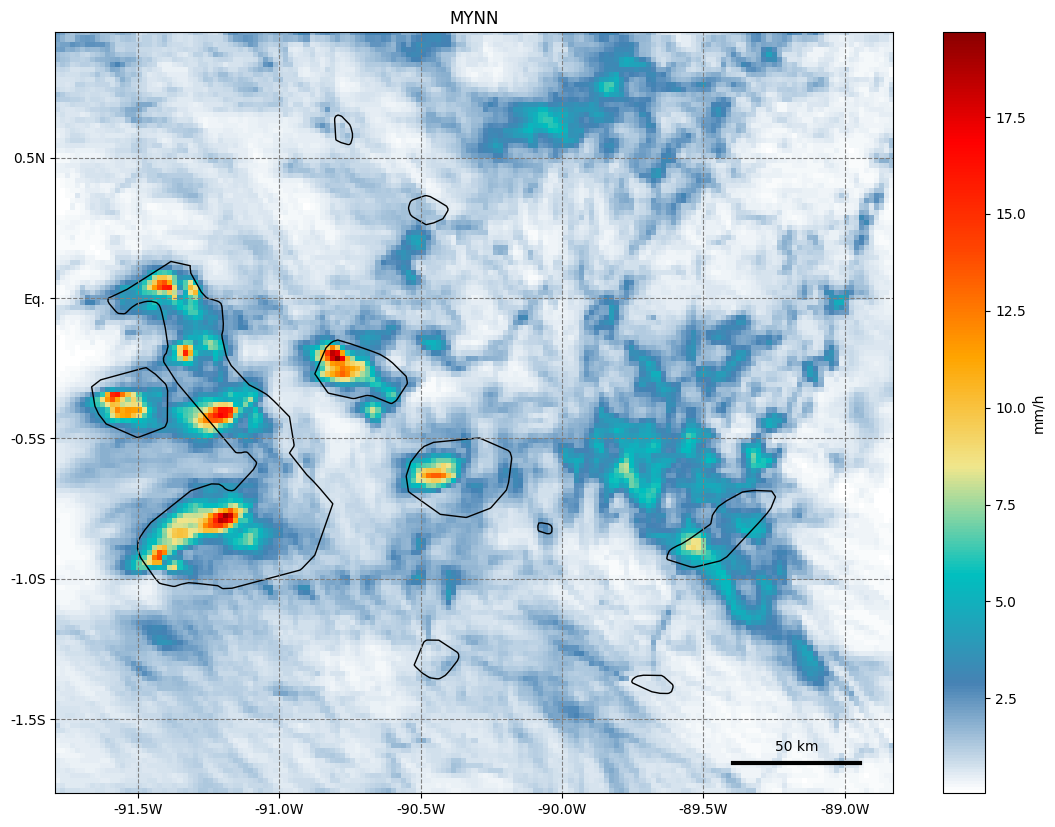

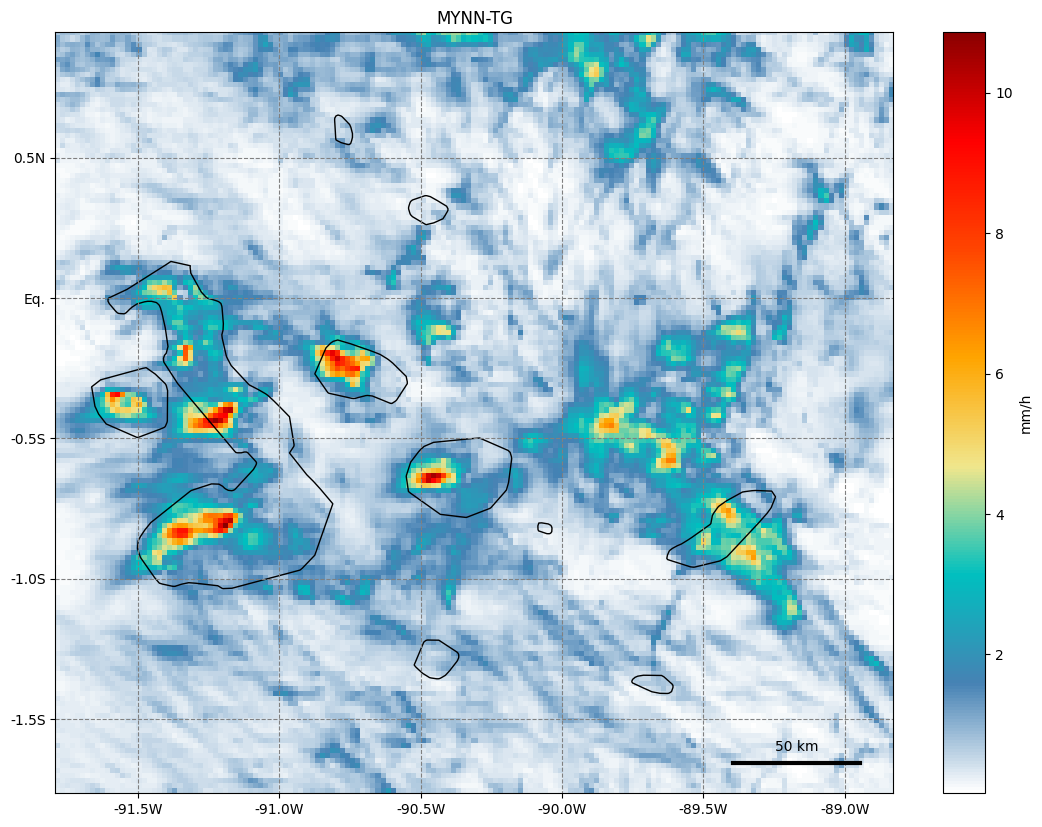

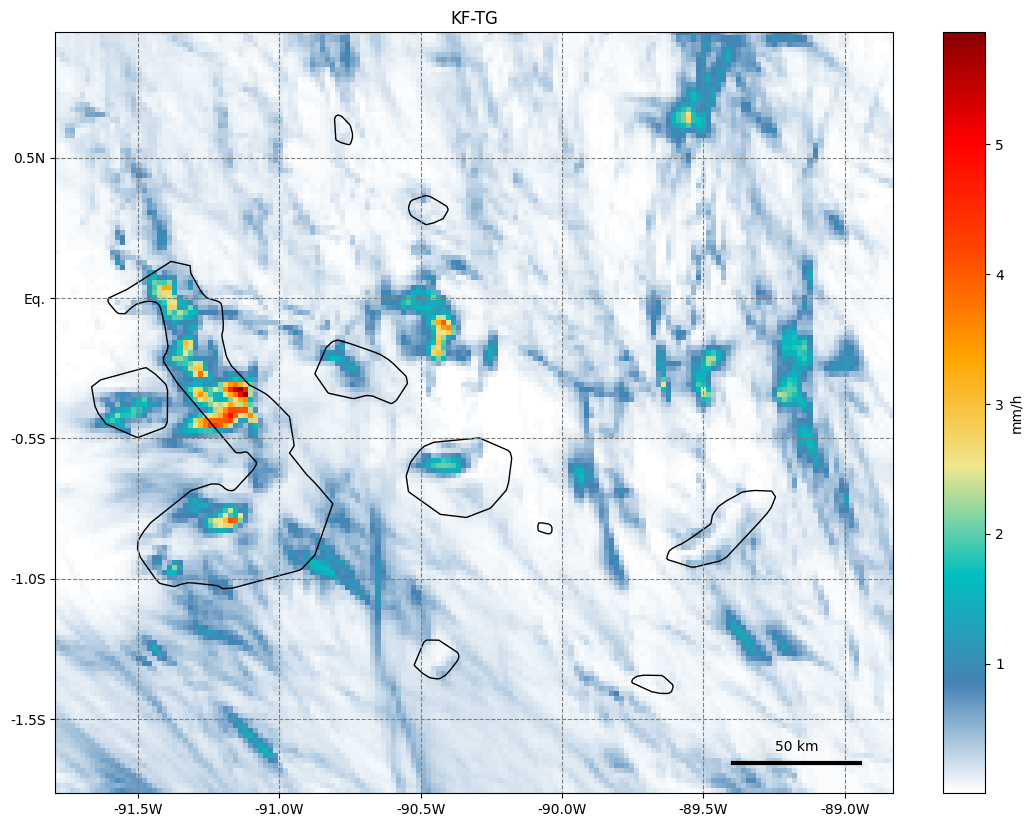

In [14]:
reload(darwin)
aggregation='mean'

for index, key in enumerate(datasets):
    fig, ax = plt.subplots(figsize=(12,12), sharex=True, sharey=True, )
    ds = datasets[key].copy()
    ds['wrf_product'] = ds.remove_boundaries(40)
    ds['experiment']
    ds.plot_map(ax=ax, aggregation=aggregation, save=False, stations=False, cbar=True, unit='mm/h')
    ax.set_title(key)
    plt.savefig(f"{ds.experiment}_{ds.varname.lower()}_{aggregation.lower()}_map.png")
    plt.show()

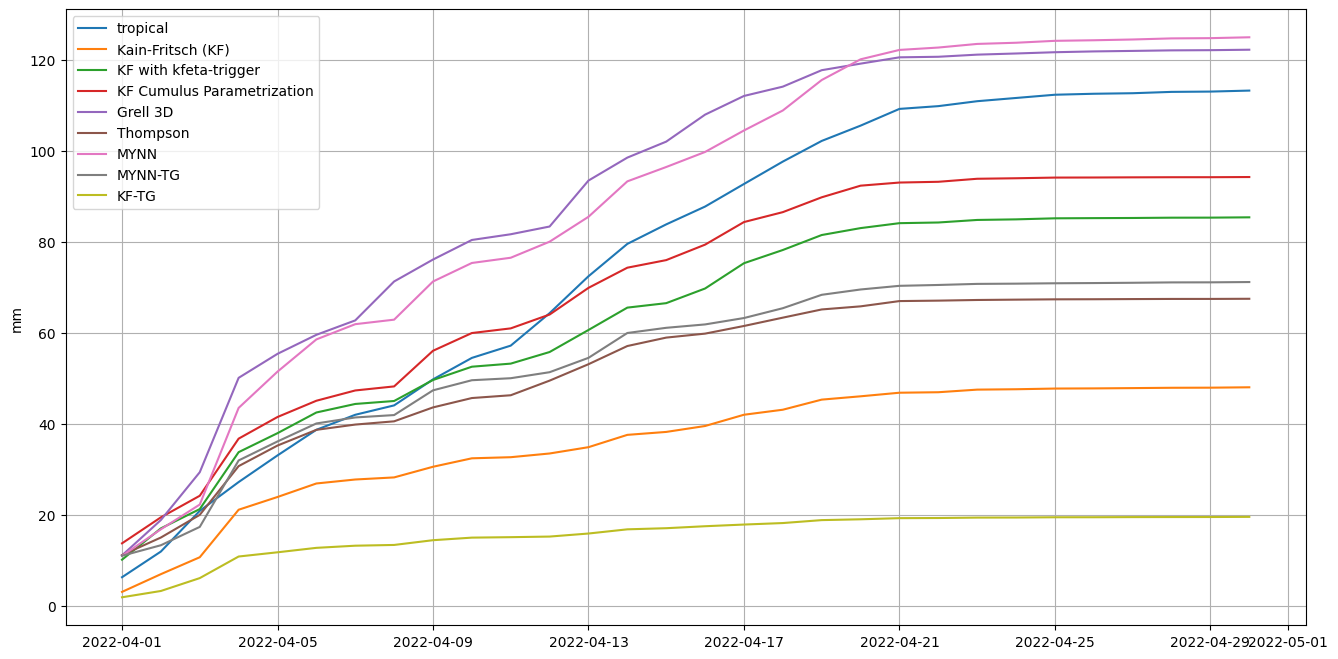

In [17]:
fig, ax = plt.subplots(figsize=(16,8))

for index, key in enumerate(datasets):
    ds = datasets[key].wrf_product.prcp.salem.roi(shape=oceans, all_touched=False)
    ax.plot(ds.time, (24 * ds.mean(axis=(1,2)).cumsum()), label=key)

ax.grid()
ax.set_ylabel('mm')
plt.legend()
plt.show()

In [16]:
mask_thompson = thompson.prcp.salem.roi(shape=oceans, all_touched=True)
mask_thompson.mean(axis=(1,2)).cumsum().plot(ax=ax, label="Thompson Graupel", color='magenta')

mask_trop = trop.prcp.salem.roi(shape=oceans, all_touched=True)
mask_trop.mean(axis=(1,2)).cumsum().plot(ax=ax, label="New Tiedtke (tropical)", color='k')
#
plt.ylabel('average precipitation in mm')
ax.legend()
# plt.savefig("domain_sizes_prcp_land.png")
plt.show()

NameError: name 'thompson' is not defined